<a href="https://colab.research.google.com/github/sks95/Machine-Learning-Complete/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble

**Ask a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer.**

A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an
Ensemble Learning algorithm is called an **Ensemble method**.

The most popular Ensemble methods, including 

*   Voting
    * Hard
    * Soft
*   bagging
    * Random Forest 
*   boosting
*   stacking
*   Cascading

We will also explore Random Forests.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#VotingClassifier

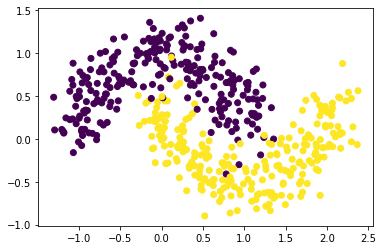

In [4]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.2, shuffle=True)
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [6]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((375, 2), (125, 2), (375,), (125,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC()

# Hard
Majority Vote

In [8]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier([
                        ('logistic', log),
                        ('neighbour', knn),
                        ('tree', dt),
                        ('nb', nb),
                        ('svc', svc)
], n_jobs = -1)

In [9]:
vot.fit(X,y)
vot.score(X, y)

0.976

In [10]:
base = [log, knn, dt, nb, svc, vot]

for model in base:
    model.fit(xtrain, ytrain)
    sc = model.score(xtest, ytest)
    print(model.__class__.__name__, sc)

LogisticRegression 0.88
KNeighborsClassifier 0.976
DecisionTreeClassifier 0.968
GaussianNB 0.88
SVC 0.976
VotingClassifier 0.96


# Soft 
Probability

In [11]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier([
                        ('logistic', log),
                        ('neighbour', knn),
                        ('tree', dt),
                        ('naives', nb),
                        ('svm', SVC(probability=True))
], n_jobs=-1, voting='soft')

In [12]:
base = [log, knn, dt, nb, svc, vot]

for model in base:
    model.fit(xtrain, ytrain)
    sc = model.score(xtest, ytest)
    print(model.__class__.__name__, sc)

LogisticRegression 0.88
KNeighborsClassifier 0.976
DecisionTreeClassifier 0.968
GaussianNB 0.88
SVC 0.976
VotingClassifier 0.976


# **Bagging and Pasting**

Above we saw base model's of very different training algorithms.

Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

When sampling is performed with replacement, this method is called **bagging** (short for **bootstrap aggregating**), bagging does row sampling.

When sampling is performed without replacement, it is called **pasting**.

![image.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Chapter%20Notes/7_Ensembler/assets/row_sampling.png)


## Generating Dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of datasets
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)

# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x**2)) + 1.5 * (np.exp(-(x-2) ** 2))

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

X_trains = []
y_trains = []

for i in range(n_repeat):
    X,y = generate(n_samples=n_train, noise=noise)
    X_trains.append(X)
    y_trains.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

In [4]:
len(X_trains), len(y_trains)

(50, 50)

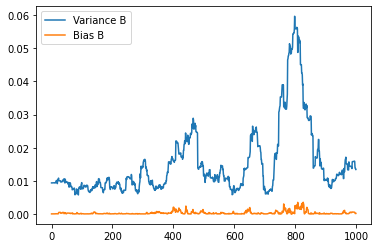

In [7]:
from sklearn.tree import DecisionTreeRegressor
MB = DecisionTreeRegressor()

y_pred = np.zeros((n_test, n_repeat))

for i in range(n_repeat):
    MB.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = MB.predict(X_test)

varianceB = np.var(y_pred, axis = 1)
biasB = (f(X_test) - np.mean(y_pred, axis=1))**2

plt.plot(varianceB, label= 'Variance B')
plt.plot(biasB, label='Bias B')
plt.legend()
plt.show()